In [1]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

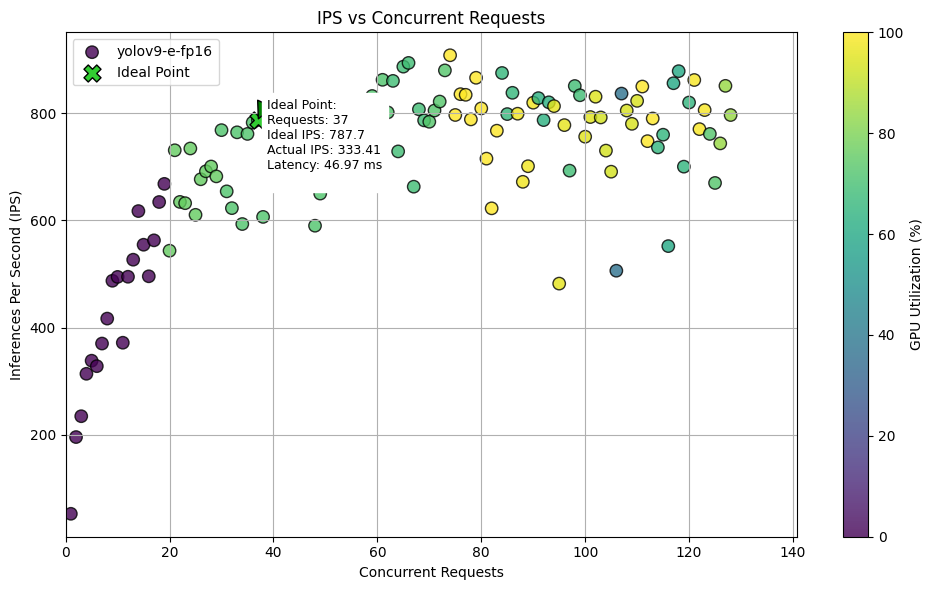

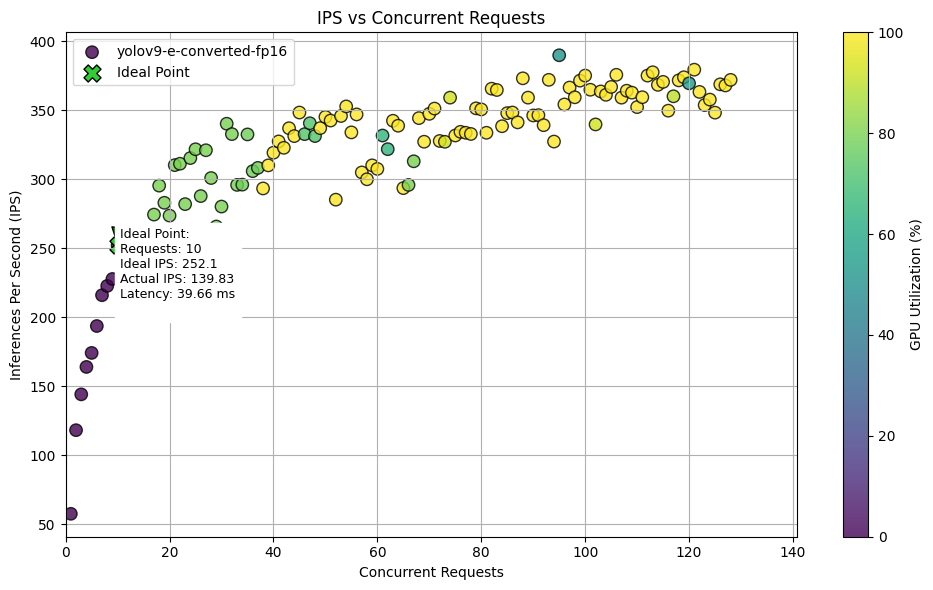

In [ ]:
result_files = {
    'yolov9-e-fp16': '/home/yves/Desktop/detection_inference_client/research/throughput/final/yolov9-e-fp16_instances_1_shapes_max_32.json',
    'yolov9-e-converted-fp16': '/home/yves/Desktop/detection_inference_client/research/throughput/final/yolov9-e-converted-fp16_instances_1_shapes_max_32.json'
}

latency_limit_ms = 50

# Define marker styles (expand if you have more models)
markers = ['o', 's', '^', 'D', 'v', 'p', '*']
colors = plt.cm.tab10.colors  # 10 distinct colors


def load_results(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    points = []
    total_fps = 0

    for key in sorted(data.keys(), key=lambda x: int(x.split('_')[-1])):
        entry = data[key]
        points.append((
            entry["requests_completed"],
            entry["average_latency_ms"],
            entry["gpu_util_percent"],
        ))
    
        total_fps += entry["throughput_fps"]
    
    # Calculate average FPS
    avg_fps = total_fps / len(data) if data else 0

    return points, avg_fps


def plot_results(files, latency_limit):
    for name, f in files.items():
        points, avg_fps = load_results(f)
        x_vals, y_vals, gpu_vals = zip(*points)

        plt.figure(figsize=(10, 6))

        sc = plt.scatter(
            x_vals, y_vals, c=gpu_vals, cmap='viridis',
            s=80, marker='o', edgecolor='black', alpha=0.8,
            label=f"{name} (Average FPS: {avg_fps:.4})"
        )

        cbar = plt.colorbar(sc)
        cbar.set_label('GPU Utilization (%)')

        plt.axhline(latency_limit, color='red', linestyle='--', label=f'Latency limit: {latency_limit} ms')

        plt.xlabel("Concurrent Requests")
        plt.ylabel("Average Latency (ms)")
        plt.title("Throughput vs Latency")
        plt.legend()
        plt.grid(True)
        plt.xlim(0, max(x_vals) * 1.1)
        plt.tight_layout()
        plt.show()


plot_results(result_files, latency_limit_ms)